In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [93]:
housing_data = pd.read_csv('./data/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
housing_data.shape

(20640, 10)

In [95]:
housing_data = housing_data.dropna()
housing_data.shape

(20433, 10)

In [96]:
housing_data = housing_data.drop(housing_data.loc[housing_data.median_house_value == 500001].index)
housing_data.shape

(19475, 10)

In [97]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [98]:
X = housing_data.drop(['median_house_value'], axis=1)
Y = housing_data['median_house_value']

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [100]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((15580, 13), (3895, 13), (15580,), (3895,))

In [101]:
linear_model = LinearRegression(normalize=True).fit(X_train, Y_train)


In [102]:
"Training score: {:.2f}".format(linear_model.score(X_train, Y_train))

'Training score: 0.61'

In [103]:
coef = pd.Series(linear_model.coef_, X.columns).sort_values()
coef

ocean_proximity_INLAND        -25817.622381
longitude                     -23871.149235
latitude                      -21825.976757
population                       -28.858927
total_rooms                       -7.224144
households                        38.174958
total_bedrooms                    93.199084
housing_median_age               944.279792
ocean_proximity_NEAR BAY        6126.482518
ocean_proximity_<1H OCEAN      12803.508202
ocean_proximity_NEAR OCEAN     17915.248384
median_income                  38705.153310
ocean_proximity_ISLAND        185805.188137
dtype: float64

In [104]:
y_pred = linear_model.predict(X_test)

In [105]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': Y_test})
df_pred_actual.head()

,predicted,actual
19241,264521.573135,254200.0
6679,212211.245257,242400.0
10453,257667.170963,312700.0
5044,190569.860757,158800.0
18249,257675.937797,280200.0


In [106]:
"Testing score: {:.2f}".format(r2_score(Y_test, y_pred))

'Testing score: 0.62'

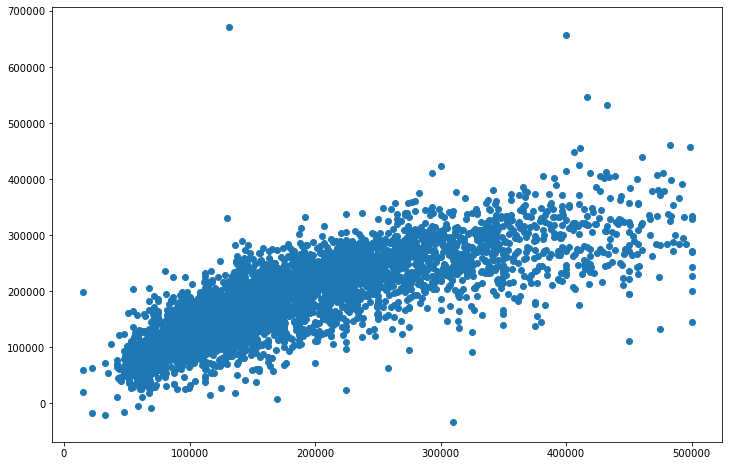

In [107]:
plt.figure(figsize=(12, 8))
plt.scatter(Y_test, y_pred)
plt.show()

In [108]:
df_pred_actual_sample = df_pred_actual.sample(n=100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()
df_pred_actual_sample.head()

,index,predicted,actual
0,9424,275697.943170,238700.0
1,20071,105877.767795,113400.0
2,18036,309585.535838,271800.0
3,10038,66986.911931,112500.0
4,7790,161284.658697,160800.0


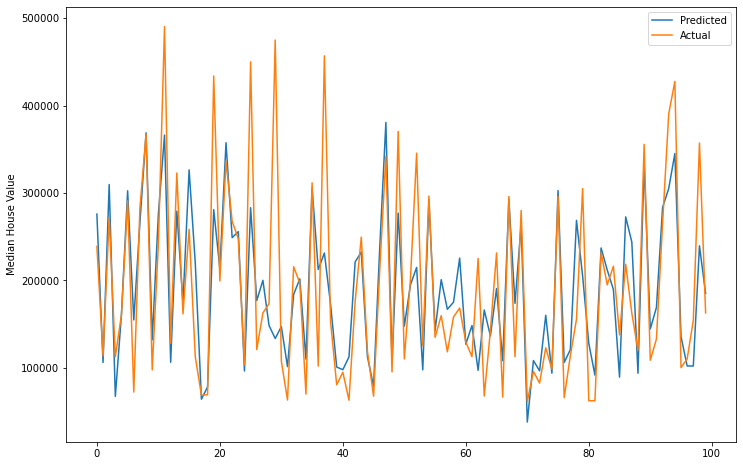

In [109]:
plt.figure(figsize=(12, 8))
plt.plot(df_pred_actual_sample.predicted, label='Predicted')
plt.plot(df_pred_actual_sample.actual, label='Actual')

plt.ylabel('Median House Value')
plt.legend()
plt.show()